# Intorductions

> - Here are some notes and comments about this datasets : This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
> - There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
> - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

# The questions about this datase
> - Does higher budget mean higher popularity ? Is there a coefficent relationship ?
> - Will the runtime affect the vote count and popularity?
> - Higher popularity means higher profits ?
> - What Features are Associate with Top 10 Revenue Movies ?
> - Which genres are most popular from year to year?


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline

# Data Wrangling:

> i did delete the dublicates and unuseful columns like imdb_id,homePage etc

In [5]:
# Load data and print head
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# check the row and columns
df.shape

(10866, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# check each columns number of unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# drop unuseful columns
df.drop(['id','imdb_id', 'homepage','overview'] , axis=1 , inplace=True)

In [12]:
#For all missing data with object as datatype , I fill in with string "missing"
colums_object = ['cast', 'director','tagline','keywords','genres','production_companies']

for x in colums_object:
    df[x].fillna('missing',inplace=True)

df['budget'] = df['budget'].replace(0, np.NAN)

In [13]:
# confirm the data
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
# check if there some dublicates
df.duplicated().sum()

1

In [17]:
# drop the dubliate value
df.drop_duplicates(inplace=True)

# confirm agine
df.duplicated().sum()

0

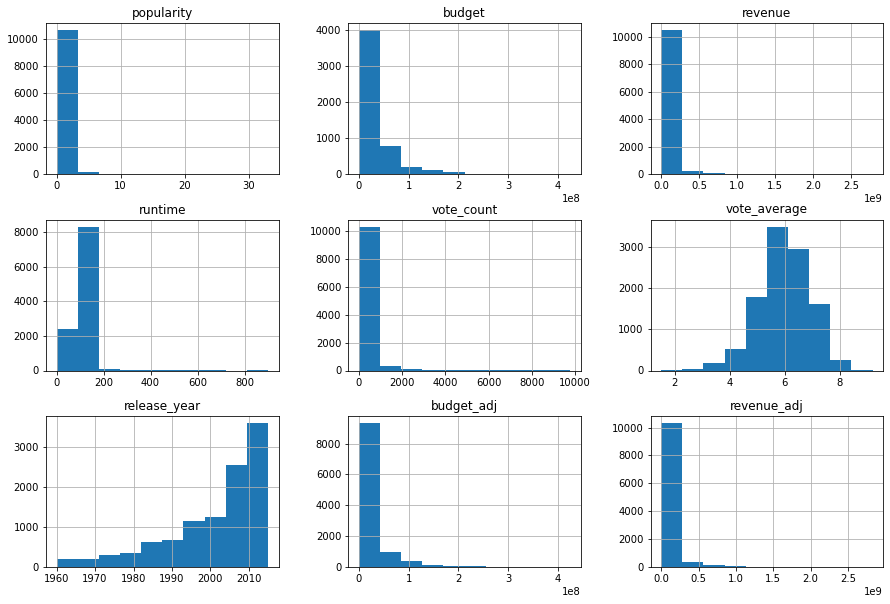

In [19]:
df.hist(figsize=(15,10));

# Exploration with Visuals and Conclusions

- Which genres are most popular from year to year?

In [21]:
# the following function can give all the count for per category

def ex_data(name_column):
    data = df[name_column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

In [23]:
genre_count = ex_data('genres')


df_genre_count = pd.DataFrame({'genres': genre_count.index , 'counts': genre_count.values})

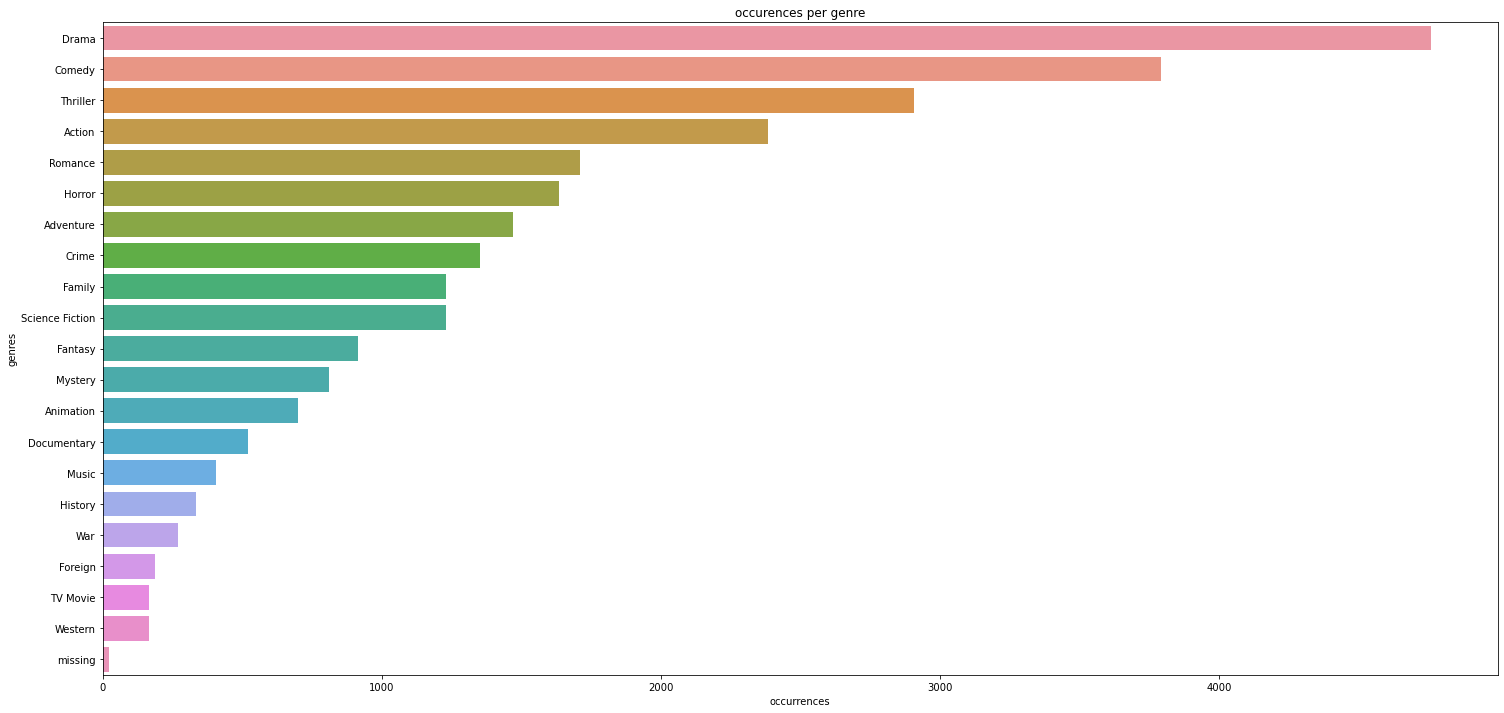

In [28]:
f ,ax = plt.subplots(figsize=(25 , 12))
sns.barplot(x= 'counts' , y = 'genres' , data = df_genre_count)
ax.set_title('occurences per genre')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

Through the previous analysis, you find that the best types are
Drama ,comedy , Action , thriller

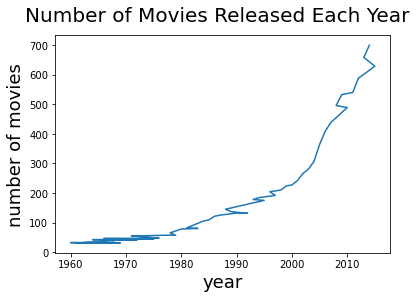

In [30]:
movie_count = df.release_year.value_counts()

fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of Movies Released Each Year',fontsize=20)
plt.xlabel('year',fontsize=18)
plt.ylabel('number of movies',fontsize=18);

Through the previous analysis The number of films is increasing

Question 2. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

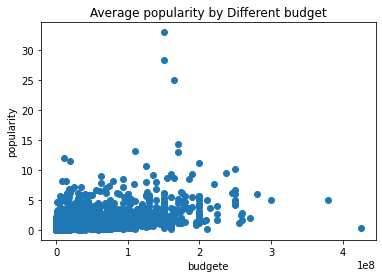

In [31]:
plt.scatter(df.budget , df.popularity)
plt.title('Average popularity by Different budget' , fontsize=12)
plt.xlabel('budgete',fontsize=10)
plt.ylabel('popularity',fontsize=10);

We can not see very strong relatioship between the budget and the popularity from above plot

In [32]:
m = df.budget.median()
low_budg = df.query('budget < {}'.format(m))
high_budg = df.query('budget >= {}'.format(m))

In [35]:
mean_popularity_of_low_budget = low_budg.popularity.mean()
mean_popularity_of_high_budget = high_budg.popularity.mean()


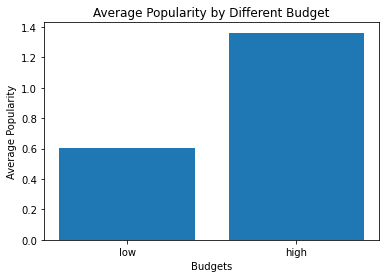

In [38]:
location = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['low','high']
plt.bar(location, heights, tick_label = labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity');

From this figure, we conclude that films with higher budgets are more popular

***What length will receive the highest popularity?***

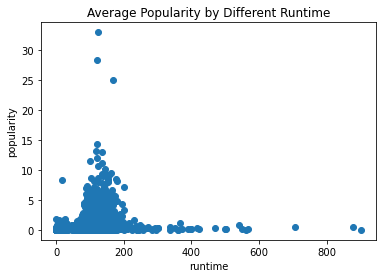

In [42]:
plt.scatter(df.runtime ,df.popularity)
plt.title('Average Popularity by Different Runtime',fontsize=12)
plt.xlabel('runtime',fontsize=10)
plt.ylabel('popularity',fontsize=10);

we can not simply say , the longer runtime, the more popular the movies are.
If the movies are within 200 minutes,it will be more popular. Once the movies run over 200 minutes, it's hard for them to gain high popularity

***Higher popularity means higher profits***

In [49]:
# we need to get the mean of popularity 
m_popularity = df.popularity.median()
lower_popularity =  df.query('popularity < {}'.format(m_popularity))
higher_popularity =  df.query('popularity >= {}'.format(m_popularity))

In [50]:
# Creat column of profit
df['profit'] = df.revenue - df.budget
df.profit.head()

0    1.363529e+09
1    2.284364e+08
2    1.852382e+08
3    1.868178e+09
4    1.316249e+09
Name: profit, dtype: float64

In [51]:
# average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity.profit.mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

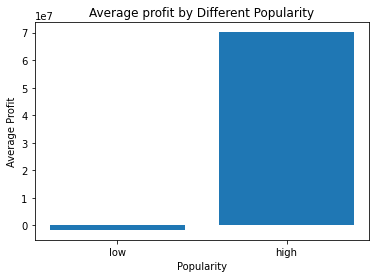

In [52]:
locations = [1,2]
heights = [mean_profit_of_low_popularity , mean_profit_of_high_popularity]
labels = ['low', 'high']
plt.bar(locations , heights , tick_label = labels)
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit');

as we can see above, higher popularity does make much higher average profits.

***What Features are Associate with Top 10 Revenue Movies ?***

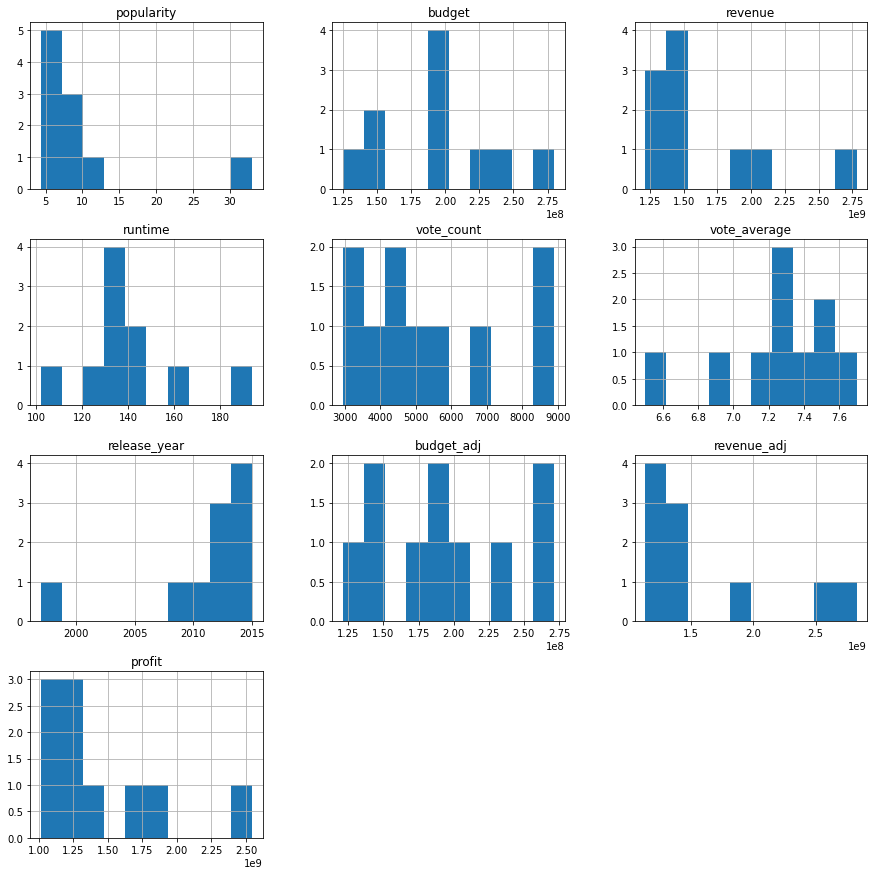

In [56]:
top_10_revenue = df.nlargest(10 , 'revenue')
top_10_revenue.hist(figsize=(15,15));



There are some characteristics we can conclude from the top 10 movies. Runtime ranges from 100 mins to 200 mins. The released year are between 1995 to 2015.


# Conclusion:
- To produce a more popular movie, the runtime should be best around 150 mins; Drama, Comedy, Action, these genres would be preferable.
- the movies with higher budgets do produce higher average popularity. 
- The quantity and range of movie gets larger

# Limitations:
- These are factors that makes the movies become popular and successful. But we should also notice the limitations. There are some missing data and many erroreous zeros which may affect the analysis.

